### **Regression Problem ~ Real_Estate.csv dataset**

- Data Visualized - Correlation matrix\ mean\ std etc

- Logistic Regression - Custom Functions used here created by self in basic.LinearRegression

- SKLearn used implementing different in-built models 

In [1]:
import numpy as np
import copy, math
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from basic.LinearRegression import compute_cost, compute_gradient, gradient_descent
from sklearn.model_selection import train_test_split



#### Data Creation

In [3]:
df = pd.read_csv("..\..\data\Linear_Regression\Real_Estate.csv")
df

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\HamzaJadoon\AppData\Local\Temp\ipykernel_10900\511505342.py:1: SyntaxWarning: invalid escape sequence '\.'
  df = pd.read_csv("..\..\data\Linear_Regression\Real_Estate.csv")


,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.01500,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.01440,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.67100,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.06700,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.40000,6,25.011037,121.479946,21.654710
...,...,...,...,...,...,...,...
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620


In [4]:
target = df[["House price of unit area"]]
y = target.to_numpy().reshape(-1,)

# df = df.drop("Longitude", axis=1)
# df = df.drop("Latitude", axis=1)

df = df.drop("House price of unit area", axis=1)
df = df.drop("Transaction date", axis=1)
df

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude
0,13.3,4082.01500,8,25.007059,121.561694
1,35.5,274.01440,2,25.012148,121.546990
2,1.1,1978.67100,10,25.003850,121.528336
3,22.2,1055.06700,5,24.962887,121.482178
4,8.5,967.40000,6,25.011037,121.479946
...,...,...,...,...,...
409,18.3,170.12890,6,24.981186,121.486798
410,11.9,323.69120,2,24.950070,121.483918
411,0.0,451.64190,8,24.963901,121.543387
412,35.9,292.99780,5,24.997863,121.558286


In [5]:
X = df.to_numpy()
col = 1
X_ = X[:, np.newaxis, col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
# Use on the training data to calculate scaling parameters and apply scaling
X_train_scaled = scaler.fit_transform(X_train)
# Use on the test data to apply the same scaling (based on the training data) without recalculating parameters
X_test_scaled = scaler.transform(X_test)

In [6]:
X_train_scaled

array([[-0.42095368,  0.8973456 , -0.43313285, -1.63507092,  1.70762426],
       [ 0.07616215, -0.80554937,  0.28370201,  0.55829294, -1.57139782],
       [-0.42095368, -0.64931362, -0.79155027,  0.91530007,  0.9242065 ],
       ...,
       [ 1.01983964, -0.5127449 , -1.50838513, -0.9238941 ,  0.94994978],
       [ 0.14356768, -0.4230818 , -1.1499677 , -0.62204248, -1.60010608],
       [ 1.39899578,  0.92859994,  0.64211944,  1.49365467, -1.28440316]])

## **Data visualization**

In [7]:
df['House price of unit area'] = y

In [8]:
df.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


#### Correlation between features and target

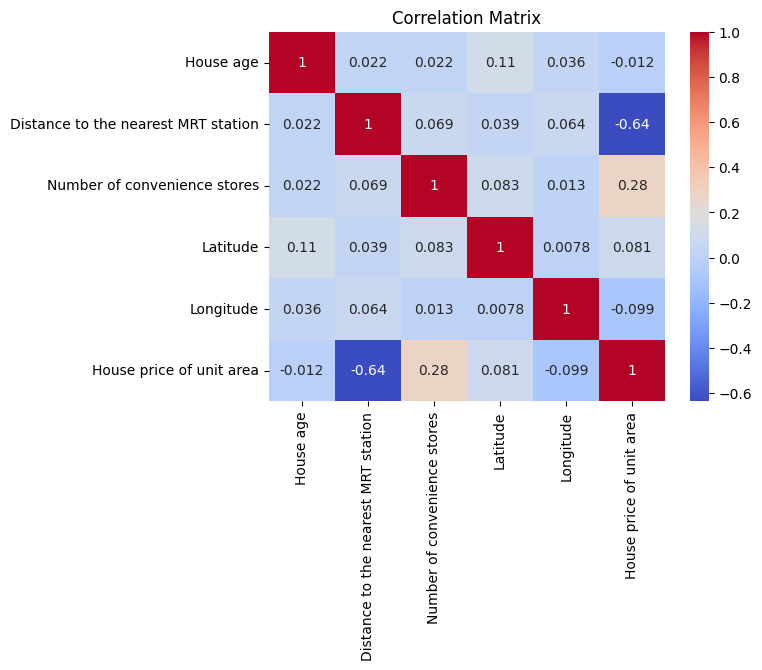

In [10]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

#### Data scatter between features and target

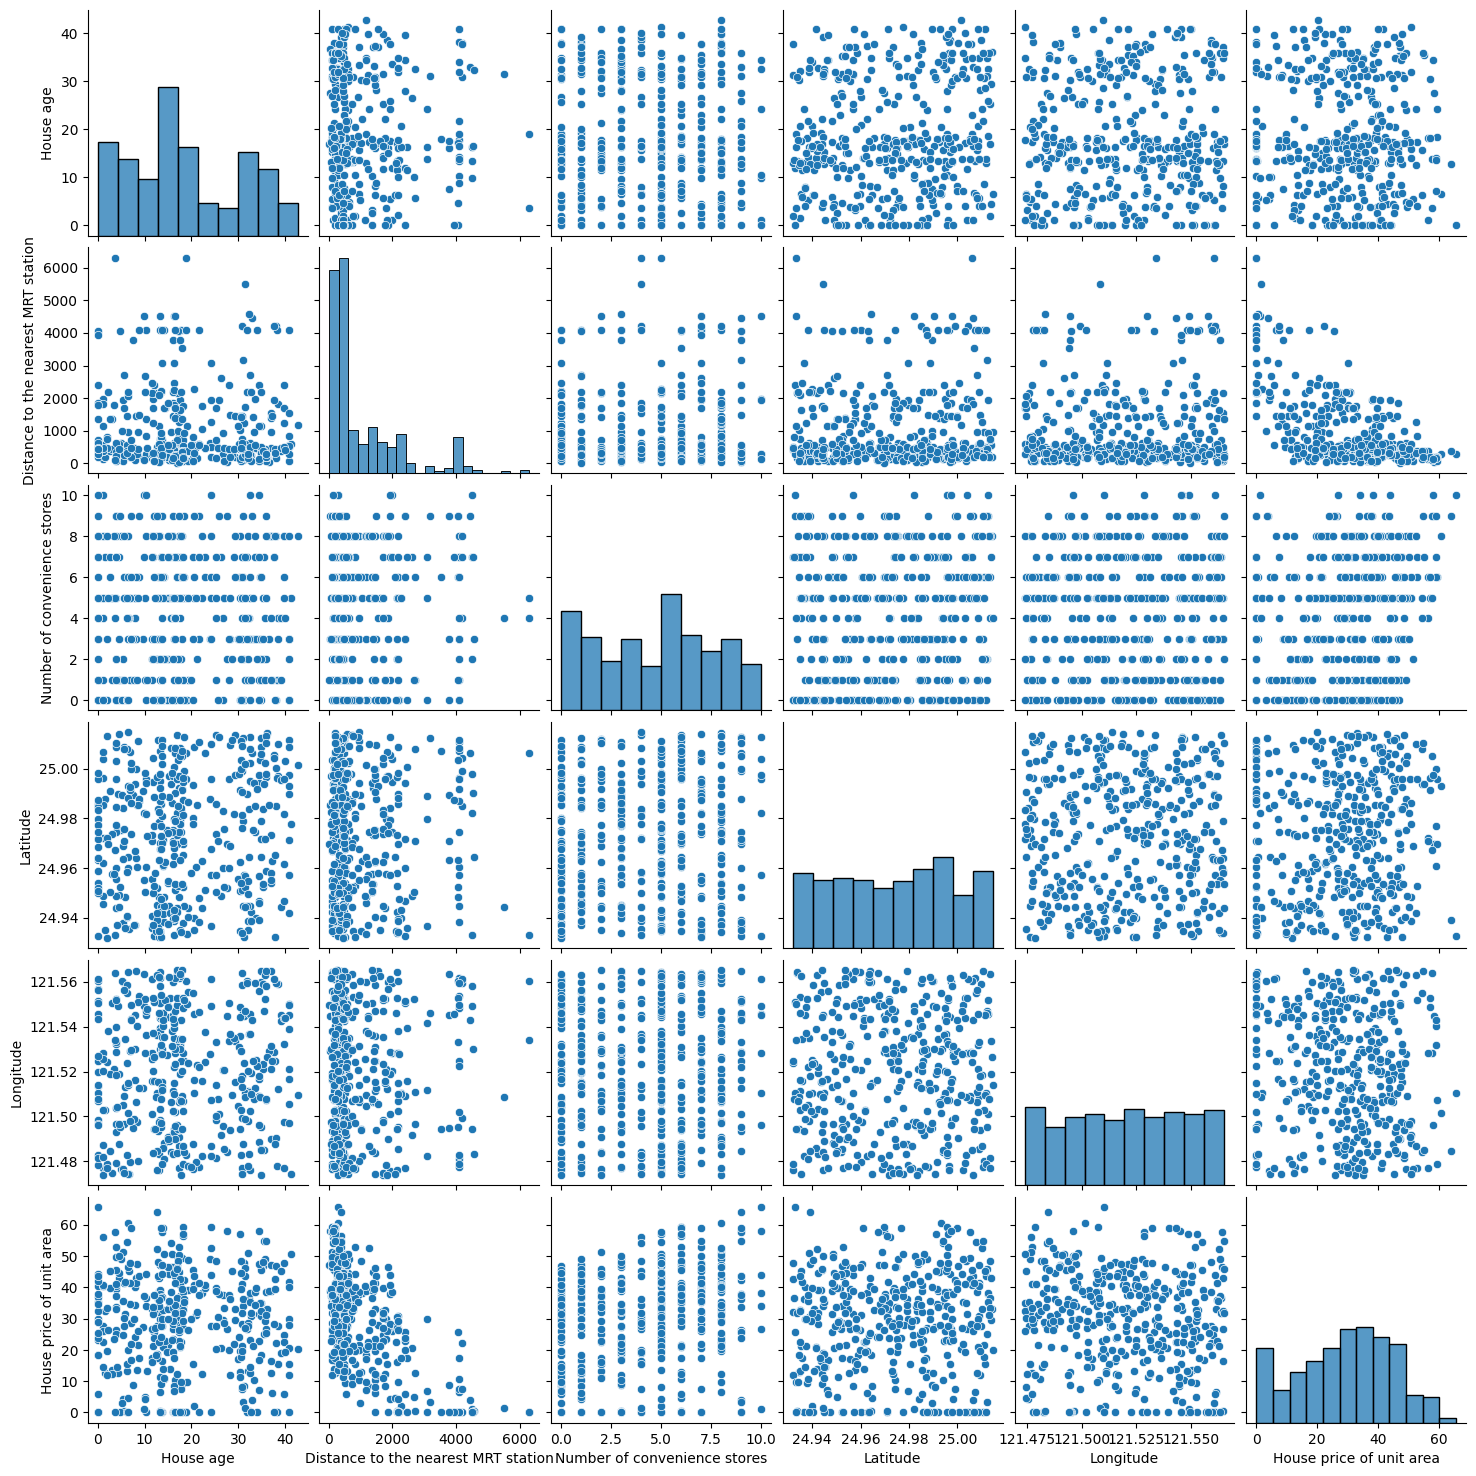

In [11]:
sns.pairplot(df)
plt.show()

In [12]:
df.columns

Index(['House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area'],
      dtype='object')

#### Data Distribution

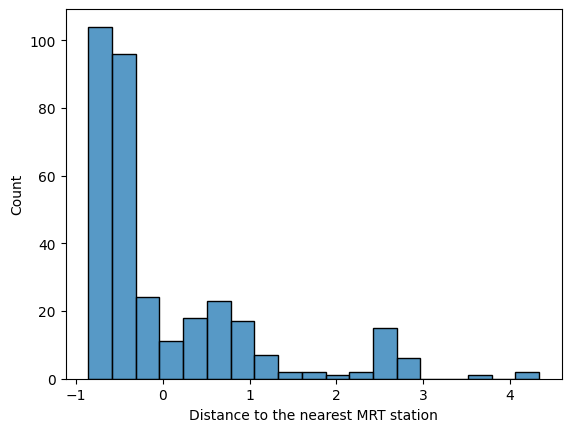

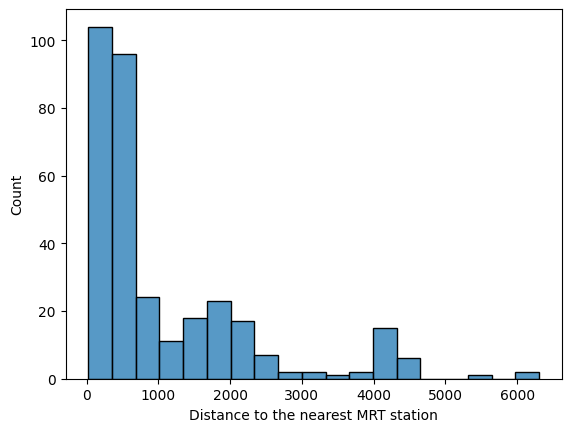

In [13]:
df = df.drop("House price of unit area", axis=1)

features_df = pd.DataFrame(X_train_scaled, columns=df.columns)
sns.histplot(features_df["Distance to the nearest MRT station"], kde=False)
plt.show()

features_df = pd.DataFrame(X_train, columns=df.columns)
sns.histplot(features_df["Distance to the nearest MRT station"], kde=False)
plt.show()

df['House price of unit area'] = y


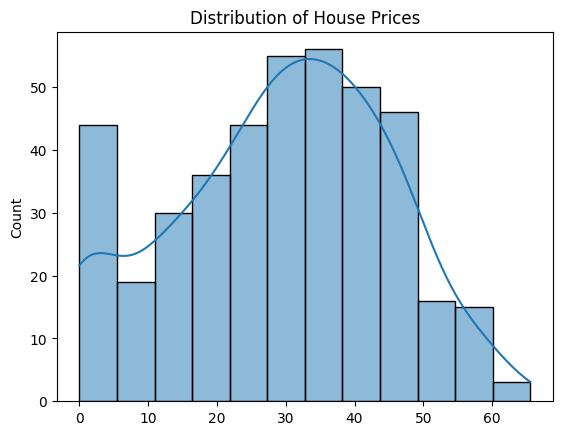

In [14]:
sns.histplot(y, kde=True)
plt.title("Distribution of House Prices")
plt.show()


#### Data Spread

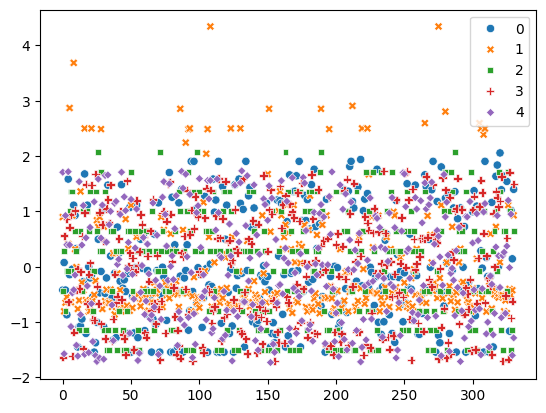

In [19]:
sns.scatterplot(X_train_scaled)
plt.show()

# chosen_features = X_train_scaled[:, [1, 3]]  # Select columns 0 and 2
# sns.scatterplot(chosen_features)
# plt.show()


#### Specific Feature and Target Scatters

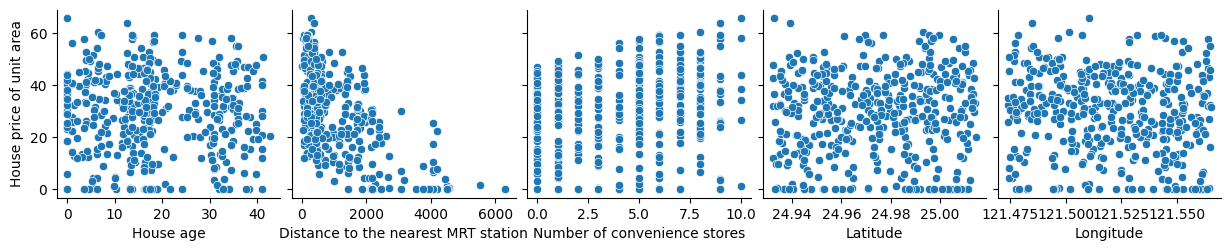

In [15]:
# scatter of one feature with target
# sns.scatterplot(x="Distance to the nearest MRT station", y=y, data=df)

# scatter of all features with target
sns.pairplot(df, y_vars='House price of unit area', x_vars=df.columns[:-1])
plt.show()


## **Custom Functions**

In [ ]:
target = df[["House price of unit area"]]
y = target.to_numpy().reshape(-1,)

# df = df.drop("Longitude", axis=1)
# df = df.drop("Latitude", axis=1)

df = df.drop("House price of unit area", axis=1)
# df = df.drop("Transaction date", axis=1)
df

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude
0,13.3,4082.01500,8,25.007059,121.561694
1,35.5,274.01440,2,25.012148,121.546990
2,1.1,1978.67100,10,25.003850,121.528336
3,22.2,1055.06700,5,24.962887,121.482178
4,8.5,967.40000,6,25.011037,121.479946
...,...,...,...,...,...
409,18.3,170.12890,6,24.981186,121.486798
410,11.9,323.69120,2,24.950070,121.483918
411,0.0,451.64190,8,24.963901,121.543387
412,35.9,292.99780,5,24.997863,121.558286


In [19]:
X = df.to_numpy()
col = 2
X_ = X[:, np.newaxis, col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
# Use on the training data to calculate scaling parameters and apply scaling
X_train_scaled = scaler.fit_transform(X_train)
# Use on the test data to apply the same scaling (based on the training data) without recalculating parameters
X_test_scaled = scaler.transform(X_test)


In [20]:
w_init = np.zeros(X_train_scaled.shape[1])
initial_b = 0
iterations = 200000
alpha = 5.0e-5
# alpha = 0.00005
# alpha = 0.0000005
w_final, b_final, J_hist = gradient_descent(X_train_scaled, y_train, w_init, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X.shape

Iteration    0: Cost   533.27   
Iteration 20000: Cost   124.05   
Iteration 40000: Cost    67.76   
Iteration 60000: Cost    59.96   
Iteration 80000: Cost    58.86   
Iteration 100000: Cost    58.71   
Iteration 120000: Cost    58.69   
Iteration 140000: Cost    58.68   
Iteration 160000: Cost    58.68   
Iteration 180000: Cost    58.68   
b,w found by gradient descent: 28.76,[  0.01469374 -10.08630134   5.06795647   1.54579615  -0.95257023] 


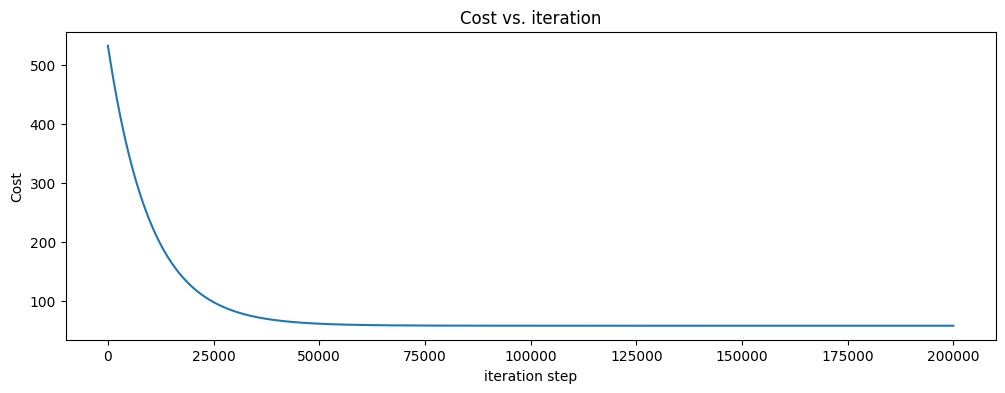

In [21]:
ax1 = plt.figure(figsize=(12, 4))
ax1 = plt.plot(J_hist)

plt.title("Cost vs. iteration")
plt.ylabel('Cost')     
plt.xlabel('iteration step')  

plt.show()

## **SKLearn**

#### OLS-LinearRegression

In [22]:
regr = linear_model.LinearRegression()
# regr = linear_model.Ridge()
# regr = linear_model.Lasso()
# regr = linear_model.ElasticNet()
# regr = linear_model.BayesianRidge()

regr.fit(X_train_scaled, y_train)
y_pred = regr.predict(X_test_scaled)

print("Coefficients: \n", regr.coef_)
print(f"Intercept (bias): {regr.intercept_}")
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Coefficients: 
 [  0.01484447 -10.08750227   5.06902708   1.54554389  -0.95199227]
Intercept (bias): 28.758313870773765
Mean squared error: 124.61
Coefficient of determination: 0.55


#### StochasticGD-Regression

Epoch    0, Loss: 1203.9183
Epoch  100, Loss: 1077.3961
Epoch  200, Loss: 966.0152
Epoch  300, Loss: 867.9420
Epoch  400, Loss: 781.5660
Epoch  500, Loss: 705.4735
Epoch  600, Loss: 638.4226
Epoch  700, Loss: 579.3231
Epoch  800, Loss: 527.2170
Epoch  900, Loss: 481.2630
Epoch 1000, Loss: 440.7220
Epoch 1100, Loss: 404.9443
Epoch 1200, Loss: 373.3595
Epoch 1300, Loss: 345.4660
Epoch 1400, Loss: 320.8228
Epoch 1500, Loss: 299.0426
Epoch 1600, Loss: 279.7846
Epoch 1700, Loss: 262.7493
Epoch 1800, Loss: 247.6731
Epoch 1900, Loss: 234.3244
Epoch 2000, Loss: 222.4992
Epoch 2100, Loss: 212.0182
Epoch 2200, Loss: 202.7235
Epoch 2300, Loss: 194.4762
Epoch 2400, Loss: 187.1537
Epoch 2500, Loss: 180.6485
Epoch 2600, Loss: 174.8656
Epoch 2700, Loss: 169.7213
Epoch 2800, Loss: 165.1420
Epoch 2900, Loss: 161.0627
Epoch 3000, Loss: 157.4261
Epoch 3100, Loss: 154.1817
Epoch 3200, Loss: 151.2849
Epoch 3300, Loss: 148.6963
Epoch 3400, Loss: 146.3813
Epoch 3500, Loss: 144.3092
Epoch 3600, Loss: 142.4528

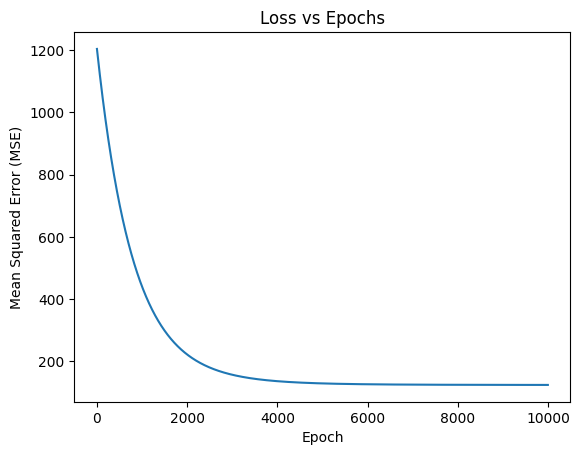

Final Test Loss (MSE): 124.7496


In [24]:
alpha = 2.0e-6
sgd_reg = linear_model.SGDRegressor(max_iter=1, tol=None, penalty=None, eta0=alpha, learning_rate='constant', warm_start=True)

n_epochs = 10000
losses = []

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_scaled, y_train)
    y_pred = sgd_reg.predict(X_test_scaled)
    loss = mean_squared_error(y_test, y_pred)
    losses.append(loss)
    
    # Optionally, print the loss for every 100 iterations
    if epoch % 100 == 0:
        print(f"Epoch {epoch:4d}, Loss: {loss:.4f}")

plt.plot(losses)
plt.title("Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.show()

y_test_pred = sgd_reg.predict(X_test_scaled)
test_loss = mean_squared_error(y_test, y_test_pred)
print(f"Final Test Loss (MSE): {test_loss:.4f}")

#### Different models

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [55]:
# regr = DecisionTreeRegressor()
# regr = RandomForestRegressor()
# regr = SVR()
# regr = MLPRegressor()
# regr = GradientBoostingRegressor()

regr.fit(X_train_scaled, y_train)
y_pred = regr.predict(X_test_scaled)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 146.30
Coefficient of determination: 0.47
